In [4]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [5]:
dataset = pd.read_csv('/content/BostonHousing.csv')
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [6]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
dataset.zn.replace(0,np.nan,inplace=True)
dataset.chas.replace(0,np.nan,inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       134 non-null    float64
 2   indus    506 non-null    float64
 3   chas     35 non-null     float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
dataset.shape

(506, 12)

In [9]:
#calculate the percentage of null values
dataset.isnull().sum()/len(dataset) * 100

crim        0.000000
zn         73.517787
indus       0.000000
chas       93.083004
nox         0.000000
rm          0.000000
age         0.000000
dis         0.000000
rad         0.000000
tax         0.000000
ptratio     0.000000
b           0.000000
lstat       0.000000
medv        0.000000
dtype: float64

In [10]:
#dropping the columns
dataset = dataset.drop(['zn','chas'],axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   indus    506 non-null    float64
 2   nox      506 non-null    float64
 3   rm       506 non-null    float64
 4   age      506 non-null    float64
 5   dis      506 non-null    float64
 6   rad      506 non-null    int64  
 7   tax      506 non-null    int64  
 8   ptratio  506 non-null    float64
 9   b        506 non-null    float64
 10  lstat    506 non-null    float64
 11  medv     506 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 47.6 KB


In [13]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,random_state = 0)

print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)


xtrain shape :  (404, 11)
xtest shape  :  (102, 11)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

y_pred = regressor.predict(xtest)


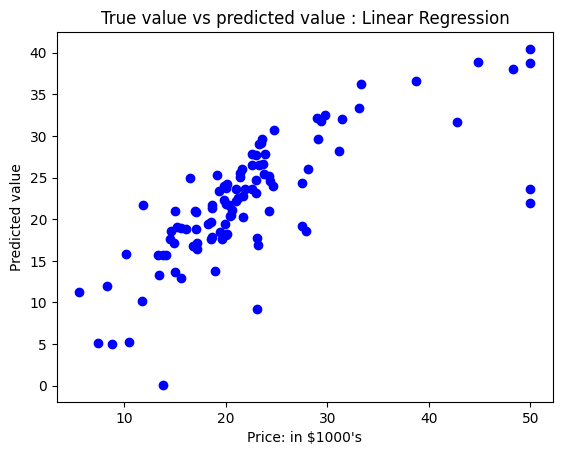

In [16]:
plt.scatter(ytest, y_pred, c = 'blue')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  35.01170873305253
Mean Absolute Error :  3.949685793659988
